In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/synthetic_doctor_drug_data.csv')

In [6]:
df

,DoctorID,Region,Specialization,Disease,Drug,NumPrescriptions
0,Doc_1,Kolkata,Pulmonologist,Skin Infection,Mupirocin,224
1,Doc_1,Kolkata,Pulmonologist,Diabetes,Metformin,468
2,Doc_1,Kolkata,Pulmonologist,Hypertension,Metoprolol,109
3,Doc_1,Kolkata,Pulmonologist,Liver Disease,Silymarin,159
4,Doc_1,Kolkata,Pulmonologist,Stroke,Clopidogrel,267
...,...,...,...,...,...,...
59945,Doc_19999,Delhi,Cardiologist,Heart Disease,Aspirin,348
59946,Doc_19999,Delhi,Cardiologist,Liver Disease,Tenofovir,75
59947,Doc_19999,Delhi,Cardiologist,Cancer,Cisplatin,424
59948,Doc_20000,Mumbai,Oncologist,Cancer,Doxorubicin,173


In [7]:
df.shape

(59950, 6)

In [8]:
df.isnull().sum()

,0
DoctorID,0
Region,0
Specialization,0
Disease,0
Drug,0
NumPrescriptions,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,NumPrescriptions
count,59950.000000
mean,254.139983
std,141.403416
min,10.000000
25%,132.000000
50%,254.000000
75%,377.000000
max,499.000000


In [11]:
df.dtypes

,0
DoctorID,object
Region,object
Specialization,object
Disease,object
Drug,object
NumPrescriptions,int64


In [12]:
df['Disease'].value_counts()

,count
Disease,
Stroke,7567
Diabetes,7548
Cancer,7535
Skin Infection,7528
Liver Disease,7516
Asthma,7483
Heart Disease,7404
Hypertension,7369


<Axes: xlabel='Region'>

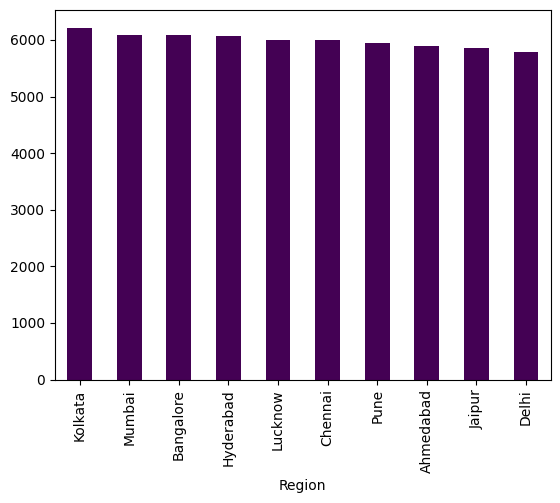

In [13]:
df['Region'].value_counts().plot(kind='bar', colormap='viridis')

In [14]:
df.groupby('Disease')['NumPrescriptions'].count()

,NumPrescriptions
Disease,
Asthma,7483
Cancer,7535
Diabetes,7548
Heart Disease,7404
Hypertension,7369
Liver Disease,7516
Skin Infection,7528
Stroke,7567


In [15]:
df.groupby('Disease')[['NumPrescriptions',]].count()

,NumPrescriptions
Disease,
Asthma,7483
Cancer,7535
Diabetes,7548
Heart Disease,7404
Hypertension,7369
Liver Disease,7516
Skin Infection,7528
Stroke,7567


<Axes: xlabel='Disease'>

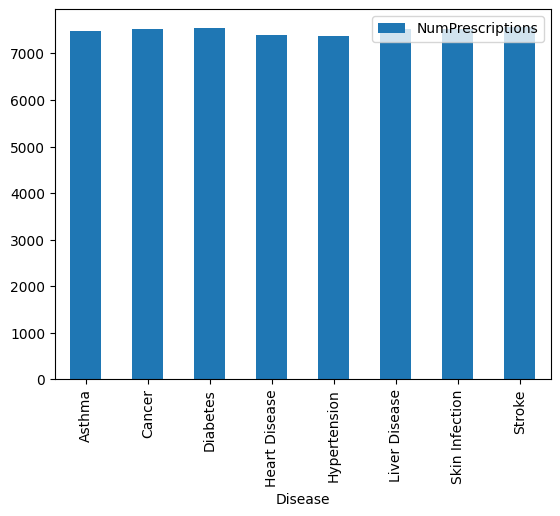

In [16]:
df.groupby('Disease')[['NumPrescriptions',]].count().plot(kind='bar')

<Axes: xlabel='Region'>

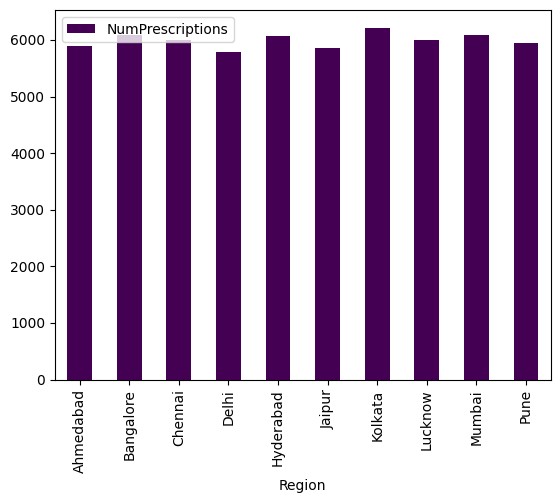

In [17]:
df.groupby('Region')[['NumPrescriptions',]].count().plot(kind='bar', colormap='viridis')

In [18]:
df.groupby('Specialization')[['NumPrescriptions',]].count()

,NumPrescriptions
Specialization,
Cardiologist,7368
Dermatologist,7689
Endocrinologist,7485
Gastroenterologist,7408
General Physician,7351
Neurologist,7346
Oncologist,7741
Pulmonologist,7562


In [19]:
df['Disease'].unique()

array(['Skin Infection', 'Diabetes', 'Hypertension', 'Liver Disease',
       'Stroke', 'Asthma', 'Cancer', 'Heart Disease'], dtype=object)

In [20]:
df['Disease'].value_counts()

,count
Disease,
Stroke,7567
Diabetes,7548
Cancer,7535
Skin Infection,7528
Liver Disease,7516
Asthma,7483
Heart Disease,7404
Hypertension,7369


In [21]:
df['Drug'].unique()

array(['Mupirocin', 'Metformin', 'Metoprolol', 'Silymarin', 'Clopidogrel',
       'Salbutamol', 'Warfarin', 'Paclitaxel', 'Ursodeoxycholic Acid',
       'Cisplatin', 'Clindamycin', 'Glipizide', 'Budesonide',
       'Montelukast', 'Aspirin', 'Alteplase', 'Amoxicillin',
       'Atorvastatin', 'Amlodipine', 'Losartan', 'Tenofovir',
       'Doxorubicin', 'Insulin'], dtype=object)

In [22]:
df['Drug'].value_counts()

,count
Drug,
Clopidogrel,5039
Paclitaxel,2599
Mupirocin,2553
Metformin,2551
Aspirin,2536
Tenofovir,2528
Montelukast,2516
Alteplase,2514
Silymarin,2513


<Axes: xlabel='Drug'>

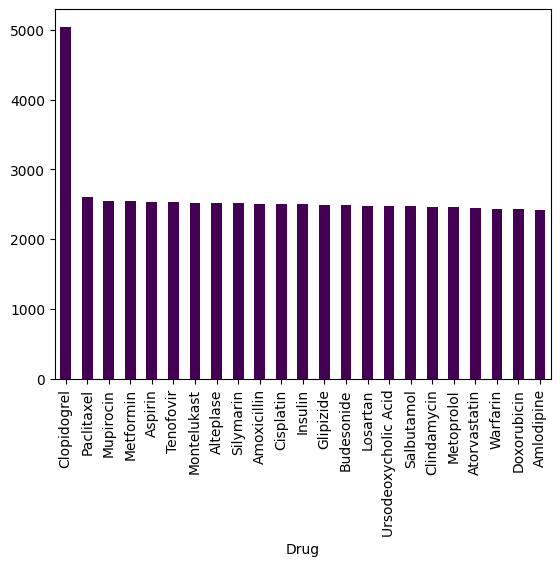

In [23]:
df['Drug'].value_counts().plot(kind='bar', colormap='viridis')

In [24]:
df['NumPrescriptions'].describe()

,NumPrescriptions
count,59950.000000
mean,254.139983
std,141.403416
min,10.000000
25%,132.000000
50%,254.000000
75%,377.000000
max,499.000000


In [25]:
df_no=df.groupby(['Region','Disease'])[['NumPrescriptions',]].count()

In [26]:
df_mean=df.groupby(['Region','Disease'])[['NumPrescriptions',]].mean()
df_mean.rename(columns={'NumPrescriptions':'avg_NumPrescriptions'},inplace=True)

In [27]:
popular_df=df_mean.merge(df_no, on=['Region','Disease'])

In [28]:
popular_df

avg_NumPrescriptions  NumPrescriptions
Region    Disease                                               
Ahmedabad Asthma                    244.338820               729
          Cancer                    259.974255               738
          Diabetes                  245.464430               745
          Heart Disease             251.611342               723
          Hypertension              263.938608               733
...                                        ...               ...
Pune      Heart Disease             259.554656               741
          Hypertension              255.302198               728
          Liver Disease             257.477573               758
          Skin Infection            257.310440               728
          Stroke                    260.474774               773

[80 rows x 2 columns]

In [29]:
popular_df = popular_df[popular_df['NumPrescriptions']>=700].sort_values(['NumPrescriptions', 'avg_NumPrescriptions'],ascending=False).head(50)

In [30]:
popular_df

avg_NumPrescriptions  NumPrescriptions
Region    Disease                                               
Kolkata   Cancer                    247.841780               809
Hyderabad Skin Infection            254.587065               804
Kolkata   Diabetes                  251.297739               796
          Stroke                    253.767970               793
Chennai   Liver Disease             249.171717               792
Bangalore Stroke                    257.277215               790
Chennai   Diabetes                  256.783055               779
Mumbai    Asthma                    256.057766               779
Hyderabad Asthma                    256.993565               777
Lucknow   Stroke                    252.740026               777
Bangalore Liver Disease             246.752896               777
Kolkata   Asthma                    253.138243               774
Bangalore Skin Infection            252.808786               774
Pune      Stroke                    260.474774               773
Mumbai    Stroke                    259.648124               773
Hyderabad Cancer                    246.983161               772
Kolkata   Liver Disease             254.697795               771
Bangalore Diabetes                  252.654096               769
Mumbai    Cancer                    251.460338               769
          Heart Disease             262.727865               768
Hyderabad Diabetes                  259.277124               765
Kolkata   Heart Disease             256.206536               765
          Skin Infection            254.449541               763
Jaipur    Skin Infection            260.176548               759
Pune      Asthma                    259.943347               759
Ahmedabad Skin Infection            253.695652               759
Mumbai    Diabetes                  257.940633               758
Pune      Liver Disease             257.477573               758
Mumbai    Hypertension              261.671070               757
Lucknow   Asthma                    250.536328               757
          Diabetes                  248.742404               757
          Skin Infection            258.273810               756
Bangalore Cancer                    252.531126               755
Ahmedabad Liver Disease             248.905960               755
Chennai   Stroke                    259.063745               753
Jaipur    Cancer                    258.648936               752
Chennai   Heart Disease             257.263648               751
Jaipur    Liver Disease             249.388815               751
Hyderabad Hypertension              257.704000               750
Mumbai    Liver Disease             251.224299               749
Hyderabad Stroke                    241.675567               749
Kolkata   Hypertension              249.458556               748
Bangalore Heart Disease             255.585791               746
Delhi     Hypertension              246.538874               746
Chennai   Asthma                    257.710067               745
Ahmedabad Diabetes                  245.464430               745
Lucknow   Heart Disease             253.528937               743
          Hypertension              252.947510               743
Pune      Heart Disease             259.554656               741
Chennai   Cancer                    257.916329               741

In [31]:
popular_df=popular_df.merge(df, on=['Region','Disease'])

In [32]:
popular_df

,Region,Disease,avg_NumPrescriptions,NumPrescriptions_x,DoctorID,Specialization,Drug,NumPrescriptions_y
0,Kolkata,Cancer,247.841780,809,Doc_8,Neurologist,Paclitaxel,471
1,Kolkata,Cancer,247.841780,809,Doc_30,Gastroenterologist,Doxorubicin,448
2,Kolkata,Cancer,247.841780,809,Doc_48,Cardiologist,Doxorubicin,145
3,Kolkata,Cancer,247.841780,809,Doc_56,Oncologist,Doxorubicin,303
4,Kolkata,Cancer,247.841780,809,Doc_87,General Physician,Cisplatin,27
...,...,...,...,...,...,...,...,...
38187,Chennai,Cancer,257.916329,741,Doc_19893,Gastroenterologist,Doxorubicin,109
38188,Chennai,Cancer,257.916329,741,Doc_19900,Oncologist,Doxorubicin,448
38189,Chennai,Cancer,257.916329,741,Doc_19903,Gastroenterologist,Paclitaxel,16
38190,Chennai,Cancer,257.916329,741,Doc_19954,Dermatologist,Paclitaxel,221


In [33]:
df.to_excel('synthetic_pharma_sales_20000docs.xlsx')

In [34]:
df.groupby('Region')['NumPrescriptions'].sum().sort_values(ascending=False)

,NumPrescriptions
Region,
Kolkata,1570814
Mumbai,1567852
Chennai,1539453
Hyderabad,1532270
Bangalore,1531135
Pune,1518729
Lucknow,1518659
Jaipur,1502594
Ahmedabad,1496037


In [35]:
df.groupby('Region')['NumPrescriptions'].sum().sort_values(ascending=False)

,NumPrescriptions
Region,
Kolkata,1570814
Mumbai,1567852
Chennai,1539453
Hyderabad,1532270
Bangalore,1531135
Pune,1518729
Lucknow,1518659
Jaipur,1502594
Ahmedabad,1496037


In [36]:
df.groupby('Disease')['NumPrescriptions'].sum().sort_values(ascending=False)

,NumPrescriptions
Disease,
Stroke,1937207
Skin Infection,1928975
Cancer,1902494
Asthma,1902127
Diabetes,1899092
Heart Disease,1898206
Liver Disease,1888747
Hypertension,1878844


In [37]:
df.groupby('Drug')['NumPrescriptions'].sum().sort_values(ascending=False)

,NumPrescriptions
Drug,
Clopidogrel,1297583
Paclitaxel,664409
Mupirocin,654032
Amoxicillin,648630
Metformin,645676
Aspirin,645147
Alteplase,642788
Montelukast,638860
Budesonide,633734


In [38]:
popular_df['Region'][0]

'Kolkata'

In [39]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.decomposition import TruncatedSVD

In [41]:
doctor_drug_matrix = df.pivot_table(
    index='DoctorID',
    columns='Drug',
    values='NumPrescriptions',
    fill_value=0
)


In [42]:
# Normalize
scaler = StandardScaler(with_mean=False)
matrix_scaled = scaler.fit_transform(doctor_drug_matrix)

In [43]:
# SVD
n_components = 20
svd = TruncatedSVD(n_components=n_components, random_state=42)
doctor_factors = svd.fit_transform(matrix_scaled)
drug_factors = svd.components_

In [44]:
# Predicted matrix
predicted_matrix = np.dot(doctor_factors, drug_factors)
predicted_cf = pd.DataFrame(predicted_matrix,
                            index=doctor_drug_matrix.index,
                            columns=doctor_drug_matrix.columns)

In [45]:
doctor_features = df.groupby('DoctorID').agg(
    TotalPrescriptions=('NumPrescriptions','sum'),
    UniqueDiseases=('Disease','nunique'),
    UniqueDrugs=('Drug','nunique'),
    AvgPrescriptionsPerDrug=('NumPrescriptions','mean')
).reset_index()


In [46]:
df_feat = df[['DoctorID','Region','Specialization','Disease','NumPrescriptions']].copy()
df_feat = df_feat.merge(doctor_features, on='DoctorID', how='left')

In [47]:
target_disease_for_new_drug = 'Diabetes' # Example target disease

doctors_for_target_disease = df_feat[df_feat['Disease'] == target_disease_for_new_drug]['DoctorID'].unique()
df_feat['Target'] = df_feat['DoctorID'].apply(lambda x: 1 if x in doctors_for_target_disease else 0)
features = ['Region','Specialization','Disease','TotalPrescriptions','UniqueDiseases','UniqueDrugs','AvgPrescriptionsPerDrug']
cat_features = ['Region','Specialization','Disease']

In [48]:
X = df_feat[features]
y = df_feat['Target']

In [49]:
stratify_arg = y if y.sum() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify_arg)

In [50]:
bincount_result = np.bincount(y_train)
neg = bincount_result[0] if len(bincount_result) > 0 else 0
pos = bincount_result[1] if len(bincount_result) > 1 else 0

scale_pos_weight = neg / pos if pos > 0 else 1 # Avoid division by zero

In [51]:
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=10,
    eval_metric='AUC',
    random_seed=42,
    verbose=100,
    class_weights=[1, scale_pos_weight] if pos > 0 else [1,1] # Apply weights only if positive examples exist
)
model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.7808509	best: 0.7808509 (0)	total: 115ms	remaining: 34.4s
100:	test: 0.7910610	best: 0.7910610 (100)	total: 3.9s	remaining: 7.7s
200:	test: 0.7932964	best: 0.7933405 (187)	total: 7.67s	remaining: 3.78s
299:	test: 0.7983355	best: 0.7983460 (298)	total: 12.3s	remaining: 0us

bestTest = 0.798345999
bestIteration = 298

Shrink model to first 299 iterations.


In [52]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("----- CatBoost Evaluation -----")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
try:
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
except ValueError:
    print("ROC AUC cannot be calculated as only one class is present in y_test.")

----- CatBoost Evaluation -----
Accuracy: 0.7081734778982486
Precision: 0.6847075917181257
Recall: 0.6813663473703235
ROC AUC: 0.7983459990196095


In [53]:
def recommend_doctors(drug_name, disease, top_n=10):
    if drug_name in predicted_cf.columns:
        scores = predicted_cf[drug_name]
        top_docs = scores.sort_values(ascending=False).head(top_n)
        return pd.DataFrame({'DoctorID': top_docs.index, 'Score': top_docs.values})
    else:
        all_doctors_df = df_feat[['DoctorID', 'Region', 'Specialization',
                                  'TotalPrescriptions', 'UniqueDiseases', 'UniqueDrugs', 'AvgPrescriptionsPerDrug']].drop_duplicates(subset=['DoctorID']).reset_index(drop=True)

        prediction_data = all_doctors_df[['DoctorID', 'Region', 'Specialization',
                                          'TotalPrescriptions', 'UniqueDiseases', 'UniqueDrugs', 'AvgPrescriptionsPerDrug']].copy()
        prediction_data['Disease'] = disease
        training_features_order = ['Region','Specialization','Disease','TotalPrescriptions','UniqueDiseases','UniqueDrugs','AvgPrescriptionsPerDrug']
        prediction_data = prediction_data[training_features_order]
        cat_features_predict = ['Region', 'Specialization', 'Disease']
        all_probs = model.predict_proba(prediction_data)[:, 1]
        all_doctors_df['ProbabilityToPrescribe'] = all_probs
        ranked_df = all_doctors_df.sort_values('ProbabilityToPrescribe', ascending=False).head(top_n)
        return ranked_df[['DoctorID', 'ProbabilityToPrescribe']]

In [54]:
def recommend_drugs(doctor_id, top_n=10):
    if doctor_id in predicted_cf.index:
        scores = predicted_cf.loc[doctor_id]
        top_drugs = scores.sort_values(ascending=False).head(top_n)
        return pd.DataFrame({'Drug': top_drugs.index, 'Score': top_drugs.values})
    else:
        return None


In [55]:
print("\nTop doctors for Metformin (Diabetes):")
print(recommend_doctors('Metformin','Diabetes'))


Top doctors for Metformin (Diabetes):
    DoctorID     Score
0  Doc_11311  4.939632
1   Doc_4583  4.874507
2   Doc_7810  4.810981
3   Doc_2878  4.802428
4  Doc_19206  4.771736
5  Doc_16876  4.771461
6   Doc_9216  4.765132
7  Doc_19678  4.724572
8  Doc_16735  4.696446
9  Doc_12522  4.677814


In [56]:
print("\nTop doctors for new drug NewDrugX (Diabetes):")
print(recommend_doctors('NewDrugX','Diabetes'))


Top doctors for new drug NewDrugX (Diabetes):
        DoctorID  ProbabilityToPrescribe
9784    Doc_9785                0.999839
19796  Doc_19797                0.999823
13348  Doc_13349                0.999821
9422    Doc_9423                0.999821
14098  Doc_14099                0.999820
18240  Doc_18241                0.999818
14251  Doc_14252                0.999818
12289  Doc_12290                0.999816
15993  Doc_15994                0.999807
15323  Doc_15324                0.999806


In [57]:
print("\nTop drugs for Doctor Doc_2737:")
print(recommend_drugs('Doc_2737'))


Top drugs for Doctor Doc_2737:
          Drug     Score
0   Paclitaxel  4.639899
1    Mupirocin  4.202489
2   Budesonide  3.282939
3  Clopidogrel  2.554139
4    Silymarin  2.318862
5     Losartan  0.813200
6   Amlodipine  0.785653
7   Metoprolol  0.723243
8    Metformin  0.540412
9    Glipizide  0.536118


In [58]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:,1]

print("Train ROC AUC:", roc_auc_score(y_train, y_train_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))


Train ROC AUC: 0.8108613148748491
Test ROC AUC: 0.7983459990196095
